<a href="https://colab.research.google.com/github/leon-czarlinski/ProfileAnalysis/blob/main/ProfileAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Profile Analysis

In this project we will cover the concept of clustering, which is a unsupervised learning algorithm that involves grouping similar data points togethes based on their characteristics. The goal of clustering is to find similarities within a dataset and group similar data points together while keeping dissimilar data points separate.

Think of this project from a business perspective. Based on the customer profile, the business can identify different clusters and customize the experience, offers, services, products, and others based on this clusterization.

## Task 1: Understand the problem statement

When analysing a dataset, it is important to to ensure ethical analysis practices, adressing issues of bias and credibility. This is a fundamental step on the **PREPARE** stage of data analysis. For this analysis, we want to check for bias

* What is our customer profile? What is the distribution of our customers when it comes to gender, age, annual income, profession, work experience and family size?
* Is there any correlation between those features? What feature is more related to the spending score?
* How can we train an unsupervised learning algorithm that involves grouping similar data points together based on the characteristics?

The data set contains some information that will give us the answer. The dataframe has the following information:

* Age: Represents the age of the applicant. Indicates the applicant's maturity level (from 18 to 70).
* Gender: Gender of the applicant (Male, Female, Other).
* Income: The applicant's income, which is critical in assessing their ability to repay the loan (multiples of 1000's).
* Credit Score: A score quantifying the applicant's creditworthiness based on their credit history (from 300 to 850).
* Credit History Length: Represents the number of months since the applicant's first credit line. Indicates the applicant's experience with credit management (in Months).
* Number of Existing Loans: The number of loans the applicant currently has (from 0 to 10).
* Loan Amount:The amount of money the applicant is requesting (from 0 to 150,000).
* Loan Tenure: The number of months the applicant wants to repay the loan over (in Months).
* Existing Customer:Whether the applicant is an existing customer of the finance company (Yes, No).
* State: The state in India where the applicant resides
* City: The city or village in India where the applicant resides.
* LTV Ratio: The loan-to-value ratio, represents the ratio of the loan amount to the appraised value of the asset (typically a house). Higher LTVs can indicate higher risk. (from 40% to 95%)
* Employment Profile: General employment category of the applicant (Salaried, Self-Employed, Freelancer, Unemployed, Student).
* Occupation: Specific occupation or job title of the applicant.
* Profile Score: A score ranging from 0 to 100 represents the overall profile of the applicant based on the actual loan repayment data. Higher values indicate better profiles (from 0 to 100).

## Task 2: Import libraries and datasets

To work with the data frame, we are going to import some libraries, such as pandas (used for data frame manipulation), numpy (used for numerical analysis), and matplotlib (used for data visualization as well)

We are also going to do some checks about the data frame to see if there are some information we need to be aware of it, before working with it.

In [1]:
#Data
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Clustering Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/ProfileAnalysis

/content/drive/MyDrive/Colab Notebooks/ProfileAnalysis


In [4]:
df = pd.read_csv('credit_data.csv')

In [5]:
df.head(5)

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


In [6]:
df.shape

(279856, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279856 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       279856 non-null  int64  
 1   Gender                    279856 non-null  object 
 2   Income                    279856 non-null  int64  
 3   Credit Score              279856 non-null  int64  
 4   Credit History Length     279856 non-null  int64  
 5   Number of Existing Loans  279856 non-null  int64  
 6   Loan Amount               279856 non-null  int64  
 7   Loan Tenure               279856 non-null  int64  
 8   Existing Customer         279856 non-null  object 
 9   State                     279856 non-null  object 
 10  City                      279856 non-null  object 
 11  LTV Ratio                 279856 non-null  float64
 12  Employment Profile        279856 non-null  object 
 13  Profile Score             279856 non-null  i

In [8]:
df.isnull().sum()

Age                             0
Gender                          0
Income                          0
Credit Score                    0
Credit History Length           0
Number of Existing Loans        0
Loan Amount                     0
Loan Tenure                     0
Existing Customer               0
State                           0
City                            0
LTV Ratio                       0
Employment Profile              0
Profile Score                   0
Occupation                  18272
dtype: int64

## Task 3: Clean the data, treating missing points

Data integrity is the accuracy, completeness, consistency, and trustworthiness of data throughout its lifecycle. Data manipulation process involves changing the data to make it more organized and easier to read.

At this point, we discover that **35 rows** have a NaN on profession. This incomplete data that is missing in important fields can decrease productivity, innaccurate insights, or inability to complete essential analysis.

using the **.dropna()** method, we are goint to delete this rows, so we can build the analysis with a dataset with complete data.


In [9]:
df[df.isnull().any(axis=1)]

,Age,Gender,Income,Credit Score,Credit History Length,...,City,LTV Ratio,Employment Profile,Profile Score,Occupation
25,61,Female,41000,307,104,...,Udaipur,58.686622,Unemployed,23,NaN
28,52,Female,87000,697,26,...,New Delhi,94.616809,Unemployed,58,NaN
31,57,Female,130000,850,600,...,Hyderabad,40.481983,Unemployed,96,NaN
33,53,Male,33000,428,576,...,New Delhi,53.836170,Unemployed,62,NaN
41,18,Other,16000,329,436,...,Hyderabad,94.802565,Unemployed,17,NaN
...,...,...,...,...,...,...,...,...,...,...,...
279777,24,Female,67000,374,238,...,Mysuru,52.352218,Unemployed,52,NaN
279792,24,Female,51000,514,549,...,Kolkata,54.303719,Unemployed,80,NaN
279806,39,Male,22000,683,262,...,Kolkata,93.614738,Unemployed,84,NaN
279825,70,Male,41000,626,151,...,Channarayapatna,53.113861,Unemployed,99,NaN


In [10]:
profile_df = df.copy()
profile_df

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279851,69,Male,61000,495,565,3,150000,14,No,Tamil Nadu,Chennai,90.300189,Salaried,71,Software Engineer
279852,45,Female,124000,850,476,10,80341,86,Yes,Karnataka,Bengaluru,78.960607,Salaried,91,Civil Servant
279853,33,Female,71000,582,560,5,39851,101,No,Karnataka,Mysuru,95.000000,Unemployed,57,NaN
279854,67,Male,191000,411,481,2,150000,111,No,Delhi,New Delhi,56.109002,Salaried,69,Software Engineer


## Task 4: Perform exploratory data analysis

Now that we have imported the data set, defined the dataframe, imported libraries and checked the data, we achieved the prepare and process the data, so we can go on and do the analysis based on the insights that we got here.

In [11]:
profile_df.dropna(axis=0, inplace=True)

In [13]:
profile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261584 entries, 0 to 279855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       261584 non-null  int64  
 1   Gender                    261584 non-null  object 
 2   Income                    261584 non-null  int64  
 3   Credit Score              261584 non-null  int64  
 4   Credit History Length     261584 non-null  int64  
 5   Number of Existing Loans  261584 non-null  int64  
 6   Loan Amount               261584 non-null  int64  
 7   Loan Tenure               261584 non-null  int64  
 8   Existing Customer         261584 non-null  object 
 9   State                     261584 non-null  object 
 10  City                      261584 non-null  object 
 11  LTV Ratio                 261584 non-null  float64
 12  Employment Profile        261584 non-null  object 
 13  Profile Score             261584 non-null  i

In [14]:
profile_df.describe()

,Age,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,LTV Ratio,Profile Score
count,261584.000000,261584.000000,261584.000000,261584.000000,261584.000000,261584.000000,261584.000000,261584.000000,261584.000000
mean,44.212043,77512.558108,585.056976,307.866766,4.740083,106109.425775,134.058761,71.552933,78.207929
std,15.320061,43270.207315,163.053416,175.051823,2.982005,40343.717106,96.308096,16.885704,23.913249
min,18.000000,9000.000000,300.000000,6.000000,0.000000,5294.000000,12.000000,40.000000,0.000000
25%,31.000000,43000.000000,449.000000,156.000000,2.000000,72671.500000,62.000000,57.974185,62.000000
50%,44.000000,69000.000000,587.000000,307.000000,5.000000,111667.000000,101.000000,72.024712,90.000000
75%,57.000000,106000.000000,725.000000,460.000000,7.000000,150000.000000,203.000000,86.140624,98.000000
max,70.000000,209000.000000,850.000000,611.000000,10.000000,150000.000000,359.000000,95.000000,100.000000


In [15]:
grouped_df = profile_df.groupby('Gender')
grouped_df.describe()[['Age','Income']].transpose()

Gender               Female           Male          Other
Age    count  124396.000000  124141.000000   13047.000000
       mean       44.238368      44.201924      44.057331
       std        15.322825      15.315081      15.341219
       min        18.000000      18.000000      18.000000
       25%        31.000000      31.000000      31.000000
       50%        44.000000      44.000000      44.000000
       75%        58.000000      57.000000      57.000000
       max        70.000000      70.000000      70.000000
Income count  124396.000000  124141.000000   13047.000000
       mean    77604.898871   77448.336972   77243.197670
       std     43290.759526   43250.395520   43263.755232
       min      9000.000000    9000.000000    9000.000000
       25%     43000.000000   43000.000000   43000.000000
       50%     69000.000000   69000.000000   68000.000000
       75%    106000.000000  106000.000000  105000.000000
       max    209000.000000  209000.000000  209000.000000

## Task 5: Perform data visualization

Data visualization is a process of creating visual representations of data to facilitate the exploration, interpretation, and communication of paterns and relationships within the data. It is a powerful tool for understanding complex data and communicating insights effectively.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

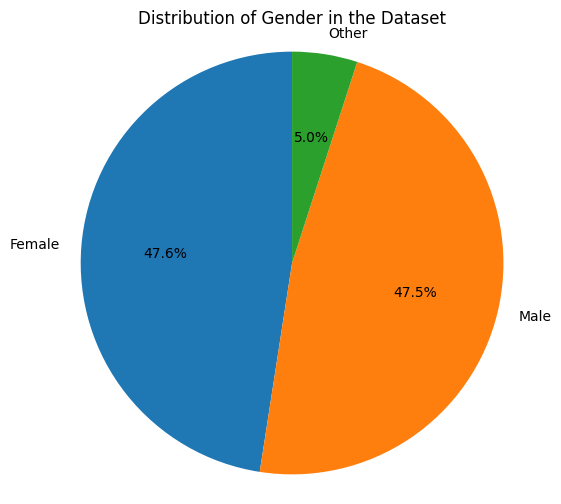

In [16]:
gender_count = profile_df['Gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Gender in the Dataset")
plt.axis('equal')

plt

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

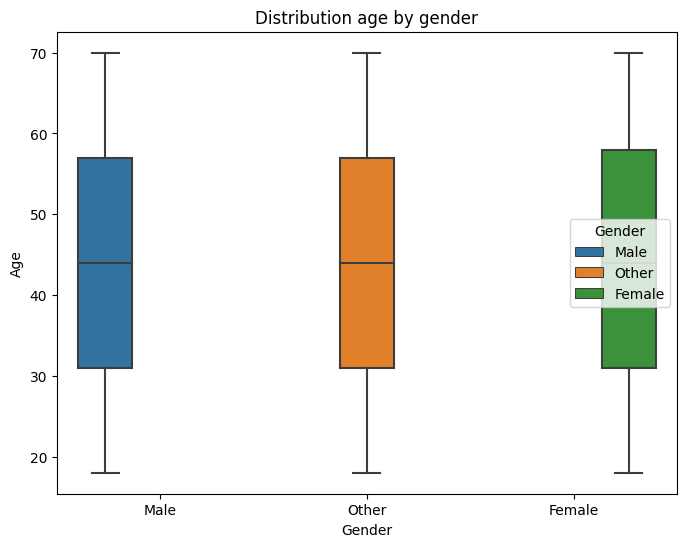

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(y='Age', x='Gender', data=profile_df, hue='Gender')
plt.title('Distribution age by gender')
sns

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

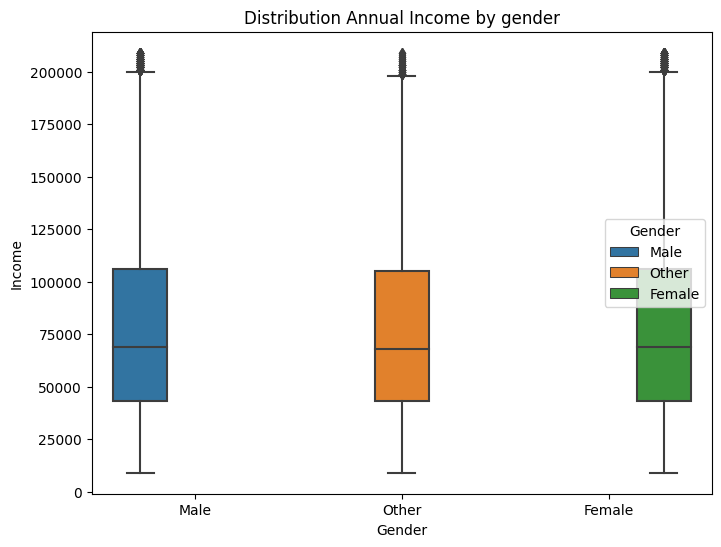

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(y='Income', x='Gender', data=profile_df, hue='Gender')
plt.title('Distribution Annual Income by gender')
sns

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

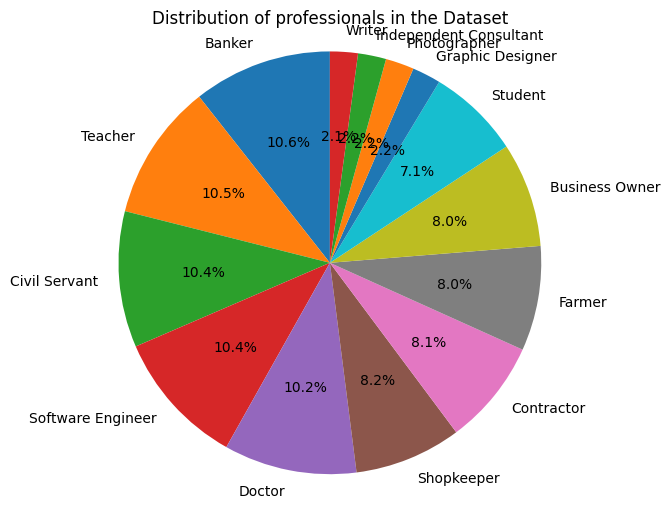

In [19]:
prof_count = profile_df['Occupation'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(prof_count, labels=prof_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of professionals in the Dataset')
plt.axis('equal')
plt